## Case Study: Finding protein-protein interaction pathways of DNA replication factor CDT1

For more information on DNA replication factor CDT1, reference https://www.ncbi.nlm.nih.gov/protein/NP_112190.2

In [1]:
import numpy as np

DESIRED_START_PROTEIN = 'CDT1'
DESIRED_END_PROTEIN = 'CDK1'

In [2]:
def find_all_elements(arr, target):
    arr = np.array(arr)

    occurrences = []
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == target:
                occurrences.append((i, j))  # Append the indices of the element if found
    indices = np.array(occurrences)
    return arr[indices[:,0],:]

In [3]:
def print_first_n_lines(data, n):
    data = np.array(data)
    print(f"Displaying first {n} rows of {data.shape[0]}:")
    for row in data[:n]:
        if isinstance(row, tuple):
            print(*row)
        else:
            print(row)
    print(f"... {data[:,0].size - n} more rows\n")

### 1) Import ppi confidence values from HIPPIE dataset (```*.mitab```)

#### Human Integrated Protein-Protein Interaction rEference
Download ```HIPPIE tab format``` from https://cbdm-01.zdv.uni-mainz.de/~mschaefer/hippie/download.php as ```HIPPIE-current.mitab```

In [4]:
import parse_mitab

ppis = parse_mitab.ppis

desired_ppis = find_all_elements(ppis, DESIRED_START_PROTEIN)
print_first_n_lines(desired_ppis, n=5)

Selected C:/Users/enoch/OneDrive/Documents/GitHub/final-project-enoch-lee/assets/HIPPIE-current.mitab.txt
Displaying first 5 rows of 783182:
['AL1A1' 'AL1A1' '0.76']
['ITA7' 'ACHA' '0.73']
['NEB1' 'ACTG' '0.65']
['SRGN' 'CD44' '0.63']
['GRB7' 'ERBB2' '0.9']
... 783177 more rows

Displaying first 5 rows of 79:
['CDT1' 'ORC2' '0.76']
['CDT1' 'SKP2' '0.9']
['CDT1' 'MCM6' '0.97']
['CDT1' 'ORC1' '0.7']
['CDT1' 'CDC6' '0.89']
... 74 more rows



### 2) Import gene ontology annotations of *Homo sapiens* (```*.gaf```)

Download the following entry:
* Species: Homo sapiens
* Database: EBI Gene Ontology Annotation Database (goa)
* Entity type: protein
* Annotations: 638780

from https://current.geneontology.org/products/pages/downloads.html as ```goa_human.gaf```

===

For the ```desired_cols``` variable:
* col 2 = object symbol
* col 3 = qualifier (what does it do?)
* col 4 = GO ID
* col 6 = evidence code (was it discovered from experimental evidence, phylogenetic inference, etc.)
* col 8 = aspect (is it part of a biological process, molecular function, or cellular component?)
* col 13 = date

Derived from https://geneontology.org/docs/go-annotation-file-gaf-format-2.2/

In [5]:
import parse_gaf

desired_cols = [2, 3, 4, 6, 8, 13]

gaf_data = parse_gaf.gaf_data
human_prots = [[row[i] for i in desired_cols] for row in gaf_data]

go_curr_protein = find_all_elements(human_prots, DESIRED_START_PROTEIN)
print_first_n_lines(go_curr_protein, n=5)

Selected C:/Users/enoch/OneDrive/Documents/GitHub/final-project-enoch-lee/assets/goa_human.gaf
Displaying first 5 lines:
['UniProtKB', 'A0A024RBG1', 'NUDT4B', 'enables', 'GO:0003723', 'GO_REF:0000043', 'IEA', 'UniProtKB-KW:KW-0694', 'F', 'Diphosphoinositol polyphosphate phosphohydrolase NUDT4B', 'NUDT4B', 'protein', 'taxon:9606', '20231122', 'UniProt']
['UniProtKB', 'A0A024RBG1', 'NUDT4B', 'enables', 'GO:0046872', 'GO_REF:0000043', 'IEA', 'UniProtKB-KW:KW-0479', 'F', 'Diphosphoinositol polyphosphate phosphohydrolase NUDT4B', 'NUDT4B', 'protein', 'taxon:9606', '20231122', 'UniProt']
['UniProtKB', 'A0A024RBG1', 'NUDT4B', 'located_in', 'GO:0005829', 'GO_REF:0000052', 'IDA', '', 'C', 'Diphosphoinositol polyphosphate phosphohydrolase NUDT4B', 'NUDT4B', 'protein', 'taxon:9606', '20230619', 'HPA']
['UniProtKB', 'A0A075B6H7', 'IGKV3-7', 'involved_in', 'GO:0002250', 'GO_REF:0000043', 'IEA', 'UniProtKB-KW:KW-1064', 'P', 'Probable non-functional immunoglobulin kappa variable 3-7', 'IGKV3-7', 'pro

In [6]:
go_terms_for_prot = set(go_curr_protein[:,2])
num_go_terms = len(go_terms_for_prot)

go_terms_for_prot = np.array(list(go_terms_for_prot))
go_terms_for_prot = go_terms_for_prot.reshape(-1, 1)
print_first_n_lines(go_terms_for_prot, n=5)

Displaying first 5 rows of 22:
['GO:0005515']
['GO:0003677']
['GO:0045786']
['GO:0071163']
['GO:0072708']
... 17 more rows



### 3) Import the Gene Ontology database (```*.obo```)

Download ```go-basic.obo``` from https://current.geneontology.org/ontology/go-basic.obo

Then, separately run ```go-basic.obo``` in ```obo_to_txt.py``` and get the output file, ```go-basic.txt```

In [7]:
from conversion import obo_to_txt
import process_GO_terms

go_terms = process_GO_terms.go_terms
go_terms = np.array(go_terms)
print_first_n_lines(go_terms, n=5)

Conversion completed. Output saved to C:\Users\enoch\OneDrive\Documents\GitHub\final-project-enoch-lee\assets\go-basic.txt
Displaying first 5 lines:
name            mitochondrion inheritance
def             "The distribution of mitochondria, including the mitochondrial genome, into daughter cells after mitosis or meiosis, mediated by interactions between mitochondria and the cytoskeleton." [GOC:mcc, PMID:10873824, PMID:11389764]
is_class_level  None
namespace       biological_process
subset          None
holds_over_chain None
xref            None
alt_id          None
is_transitive   None
is_obsolete     None
is_a            GO:0048311
comment         None
relationship    None
replaced_by     None
is_metadata_tag None
synonym         "mitochondrial inheritance" EXACT []
id              GO:0000001
consider        None


name            mitochondrial genome maintenance
def             "The maintenance of the structure and integrity of the mitochondrial genome; includes replication and seg

### 4) Build a local ppi network using NetworkX

Building "locally" means starting from the starting node and appending the nearest neighbors (breadth-first). Each edge has a special attribute known as "confidence", which represents the HIPPIE confidence value between the two proteins (nodes).

__Note:__ This step may take a while (anywhere from 1 minute to 10 minutes)

Documentation on https://networkx.org/

In [8]:
import networkx as nx
from collections import deque

def build_graph(start_node, desired_node, max_node_centers, ppi_net):
    graph = nx.Graph()
    queue = deque([(start_node, None)])  # (node, parent_node, circle_count)
    visited = set()
    
    i = 0
    while queue and i < max_node_centers:
        current_node, parent_node = queue.popleft()
        
        if current_node not in visited:
            curr_ppis = find_all_elements(ppi_net, current_node)

            for pp_pair in curr_ppis:
                curr_neighbor = None;
                if pp_pair[0] == current_node and pp_pair[1] == current_node:
                    continue
                elif pp_pair[0] == current_node:
                    curr_neighbor = pp_pair[1]
                elif pp_pair[1] == current_node:
                    curr_neighbor = pp_pair[0]

                if curr_neighbor is not None:
                    graph.add_edge(current_node, curr_neighbor, confidence=float(pp_pair[2]))
                elif curr_neighbor == desired_node:
                    break

                queue.append((curr_neighbor, current_node))

            visited.add(current_node)
            i += 1

    return graph

In [9]:
# Add nodes to graph by gradually circling around and around the original protein
max_node_centers = 150
G = build_graph(DESIRED_START_PROTEIN, DESIRED_END_PROTEIN, max_node_centers, ppis)

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
# Commented out since it's VERY slow!
#nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000)
plt.show()

<Figure size 1200x600 with 0 Axes>

### 5) Simulate randomness of protein interactions using a random walk, taking confidence scores into account

In [11]:
def get_confidence_score(graph, node1, node2):
    try:
        return graph[node1][node2]['confidence']
    except KeyError:
        pass
    try:
        return graph[node2][node1]['confidence']
    except KeyError:
        pass
    return None

In [102]:
def random_walk_bfs(graph, start_node, target_node, max_steps, param=1.0):
    visited = set()
    queue = deque([(start_node, None, 0)])  # (node, parent_node, steps)
    interactions = {}  # Accumulator for interactions leading to the target node

    while queue:
        current_node, parent_node, steps = queue.popleft()
        visited.add(current_node)

        if current_node == target_node:
            if parent_node is not None:
                interactions[current_node] = parent_node
                break
        
        if steps >= max_steps:
            return []  # Stop if the maximum number of steps is reached

        # Get neighbors of the current node
        neighbors = list(graph[current_node])

        # Iterate through neighbors
        for neighbor in neighbors:            
            # Check if the interaction occurs based on HIPPIE confidence score
            confidence_score = get_confidence_score(graph, current_node, neighbor)
            
            if confidence_score is not None:
                # Random walk, between 0 and 1
                interaction_prob = np.random.random()

                if interaction_prob < confidence_score*param and neighbor not in visited:
                    queue.append((neighbor, current_node, steps + 1))
                    interactions[neighbor] = current_node
        
    pathway = []
    current = target_node
    while current is not None:
        parent = interactions.get(current)
        if parent is not None:
            pathway.append((parent, current))
        current = parent
    return pathway[::-1]  # Return the pathway from the start node to the target node in reverse order

In [13]:
print(f"Number of nodes in G: {G.number_of_nodes()}")
if G.has_node(DESIRED_END_PROTEIN):
    print(f"The end protein {DESIRED_END_PROTEIN} is in the graph.")
else:
    print(f"The end protein {DESIRED_END_PROTEIN} is not in the graph.")

Number of nodes in G: 10726
The end protein CDK1 is in the graph.


In [44]:
# Test to see if random_walk_bfs() works
max_steps = 3

pathway = random_walk_bfs(G, DESIRED_START_PROTEIN, DESIRED_END_PROTEIN, max_steps)

if pathway:
    print("Interactions leading to the target node:")
    for interaction in pathway:
        print(interaction, get_confidence_score(G, interaction[0], interaction[1]))
        
else:
    print(f"The end protein {DESIRED_END_PROTEIN} is not reachable from the start protein {DESIRED_START_PROTEIN} within {max_steps} steps.")

Interactions leading to the target node:
('CDT1', 'SKP2') 0.9
('SKP2', 'GEMI') 0.82
('GEMI', 'CDK1') 0.82


### 6) Using the current model, generate many pathways, then sum up the occurrences of each protein

In [103]:
def resimulate(G, start_protein, end_protein, n_times, param=1.0):
    protein_count = {}
    for i in range(n_times):
        # Do simulation
        pathway = random_walk_bfs(G, start_protein, end_protein, max_steps, param)
        
        if pathway:
            # Get names of proteins in pathway
            proteins_in_pathway = []
            for r in range(len(pathway)):
                proteins_in_pathway.append(pathway[r][0])
                if r == len(pathway) - 1:
                    proteins_in_pathway.append(pathway[r][1])

            # Add name or increment in protein_count
            for protein in proteins_in_pathway:
                protein_count[protein] = protein_count.get(protein, 0) + 1
        else:
            protein_count["NO PATH FOUND"] = protein_count.get("NO PATH FOUND", 0) + 1
    
    return protein_count

In [107]:
def resimulate_and_plot(G, start_protein, end_proteins, num_times_to_resimulate, param=1.0):
    protein_counts = []
    
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    axs = axs.flatten()

    i = 0
    for end_protein in end_proteins:
        if G.has_node(end_protein):
            print(f"The end protein {end_protein} is in the graph.")
        else:
            print(f"The end protein {end_protein} is not in the graph.")

        protein_count = resimulate(G, start_protein, end_protein, num_times_to_resimulate, param)
        protein_counts.append(protein_count)
        
        axs[i].bar(protein_count.keys(), protein_count.values())
        axs[i].set_title(f"Between {start_protein} to {end_protein}")
        axs[i].set_xticklabels(protein_count.keys(), rotation=45)
        axs[i].grid(axis='y')

        i += 1

    fig.suptitle(f"Prediction of proteins in pathway with {num_times_to_resimulate} simulations, parameter = {param}", fontsize=16)
    fig.text(0.5, 0.02, 'Proteins found in pathway', ha='center', fontsize=14)
    fig.text(0.02, 0.5, 'Total frequency in predicted pathways', va='center', rotation='vertical', fontsize=14)

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
    plt.savefig(f"../assets/{start_protein}_pathway_prediction_param_{str(param).replace('.', '_')}.png")
    plt.show()

    print(f"Figure saved to '../assets/{start_protein}_pathway_prediction_param_{str(param).replace('.', '_')}.png'")
    
    return protein_counts

The end protein MCM4 is in the graph.


C:\Users\enoch\AppData\Local\Temp\ipykernel_4000\1681382135.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(protein_count.keys(), rotation=45)


The end protein ORC3 is in the graph.
The end protein ORC6 is in the graph.
The end protein GEMI is in the graph.
The end protein MCM7 is in the graph.
The end protein MCM6 is in the graph.
The end protein ORC1 is in the graph.
The end protein MCM8 is in the graph.
The end protein CDC6 is in the graph.


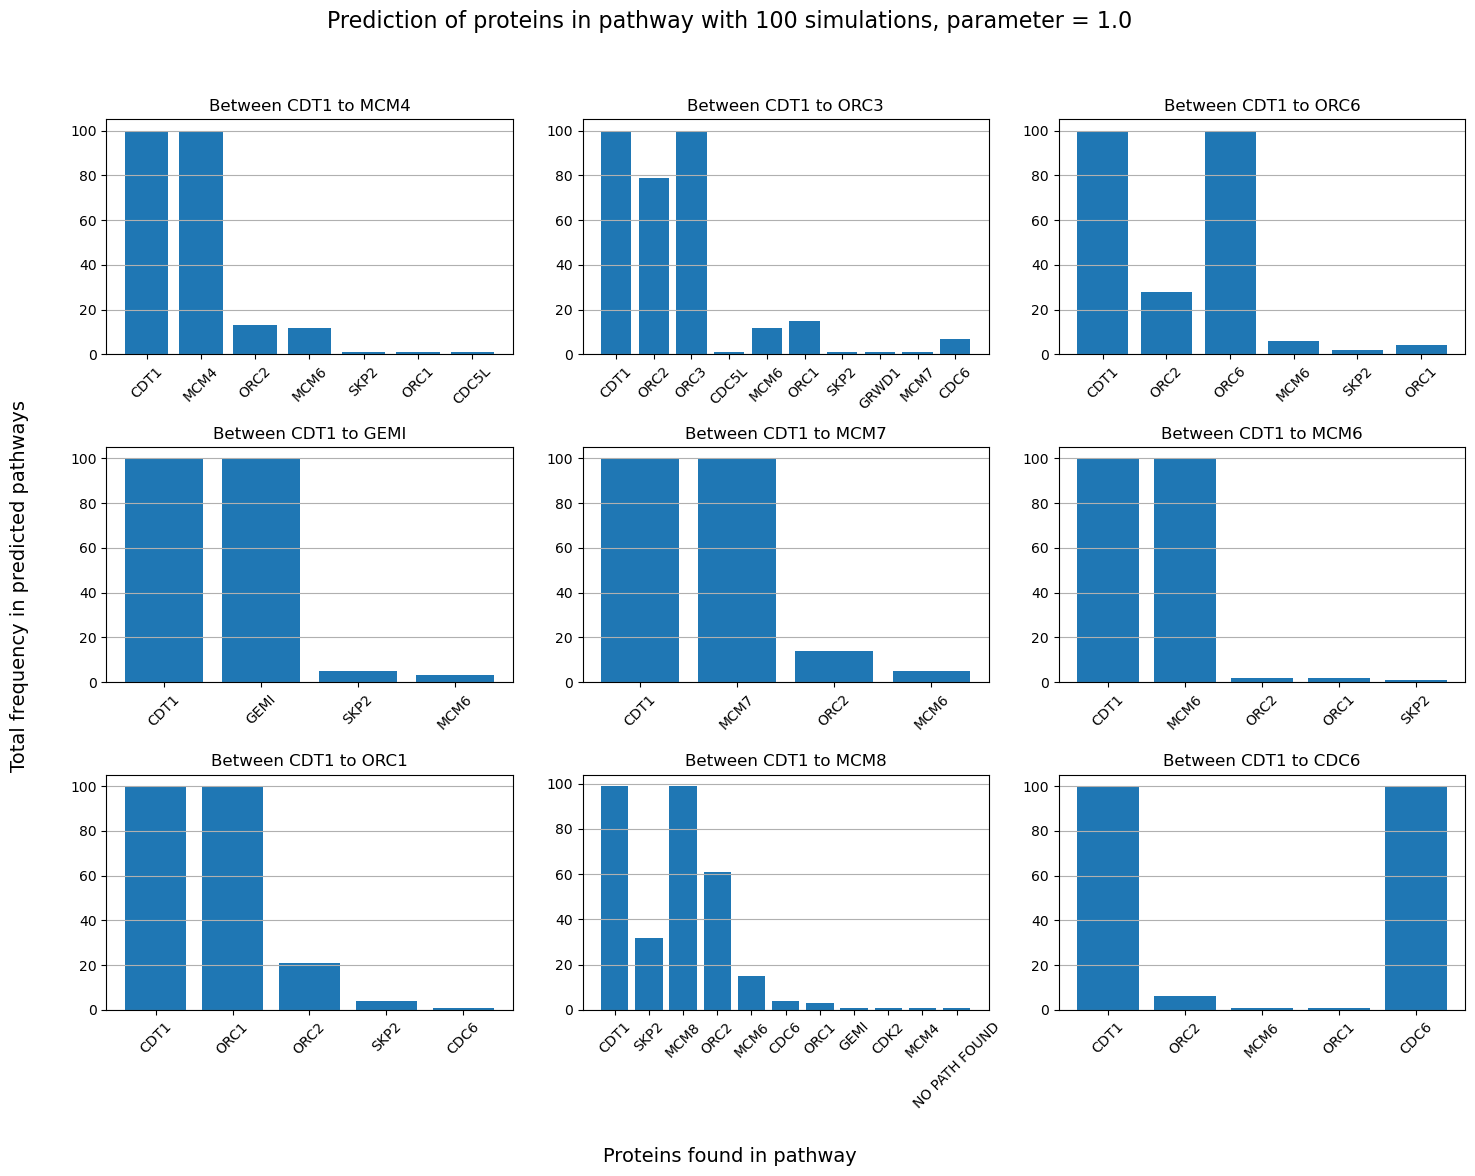

Figure saved to '../assets/CDT1_pathway_prediction_param_1_0.png'


In [108]:
start_protein = DESIRED_START_PROTEIN
end_proteins = {'CDC6', 'GEMI', 'ORC1', 'ORC3', 'ORC6', 'MCM4', 'MCM6', 'MCM7', 'MCM8'}
n_times = 100

p10 = resimulate_and_plot(G, start_protein, end_proteins, n_times, param=1.0)

### 7) Adjust confidence score parameter

The confidence score parameter is the parameter that we multiply the confidence score by. If parameter > 1, then we effectively increase the confidence score, making protein-protein interactions more likely. If parameter < 1, then we effectively decrease the confidence score, making protein-protein interactions more likely. Let's see how adjusting the confidence score parameter will result in more accurate data.

The end protein MCM4 is in the graph.


C:\Users\enoch\AppData\Local\Temp\ipykernel_4000\1681382135.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(protein_count.keys(), rotation=45)


The end protein ORC3 is in the graph.
The end protein ORC6 is in the graph.
The end protein GEMI is in the graph.
The end protein MCM7 is in the graph.
The end protein MCM6 is in the graph.
The end protein ORC1 is in the graph.
The end protein MCM8 is in the graph.
The end protein CDC6 is in the graph.


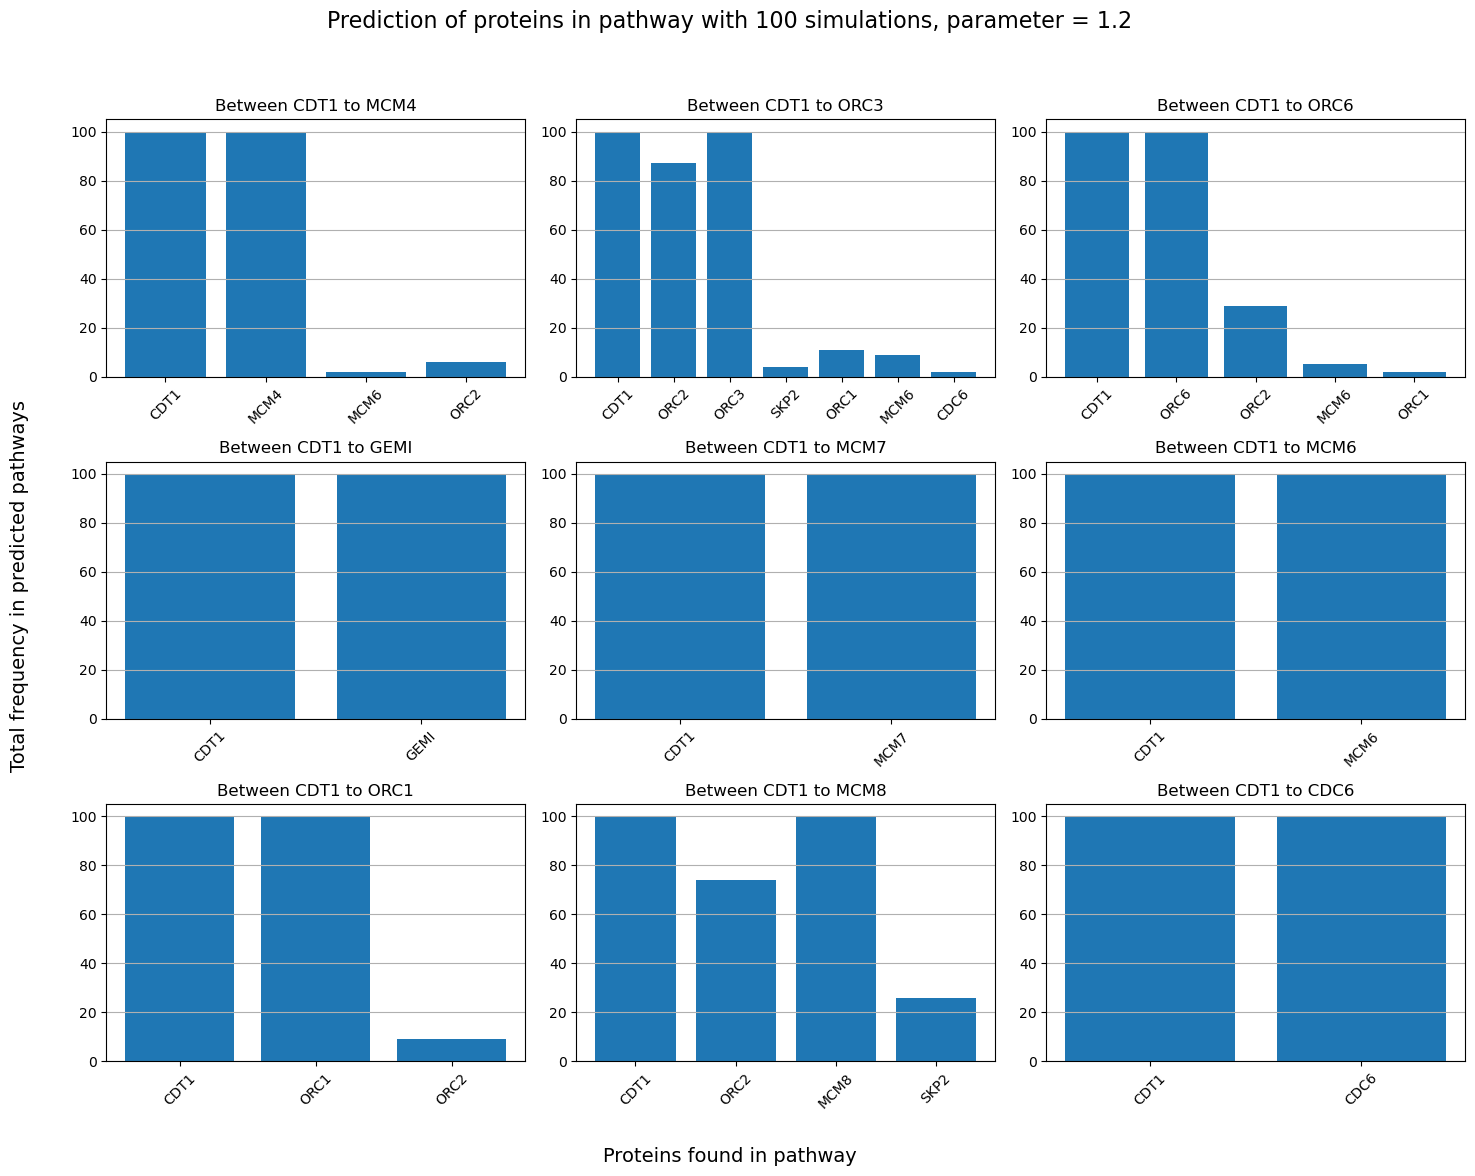

Figure saved to '../assets/CDT1_pathway_prediction_param_1_2.png'


In [109]:
p12 = resimulate_and_plot(G, start_protein, end_proteins, n_times, param=1.2)

The end protein MCM4 is in the graph.


C:\Users\enoch\AppData\Local\Temp\ipykernel_4000\1681382135.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(protein_count.keys(), rotation=45)


The end protein ORC3 is in the graph.
The end protein ORC6 is in the graph.
The end protein GEMI is in the graph.
The end protein MCM7 is in the graph.
The end protein MCM6 is in the graph.
The end protein ORC1 is in the graph.
The end protein MCM8 is in the graph.
The end protein CDC6 is in the graph.


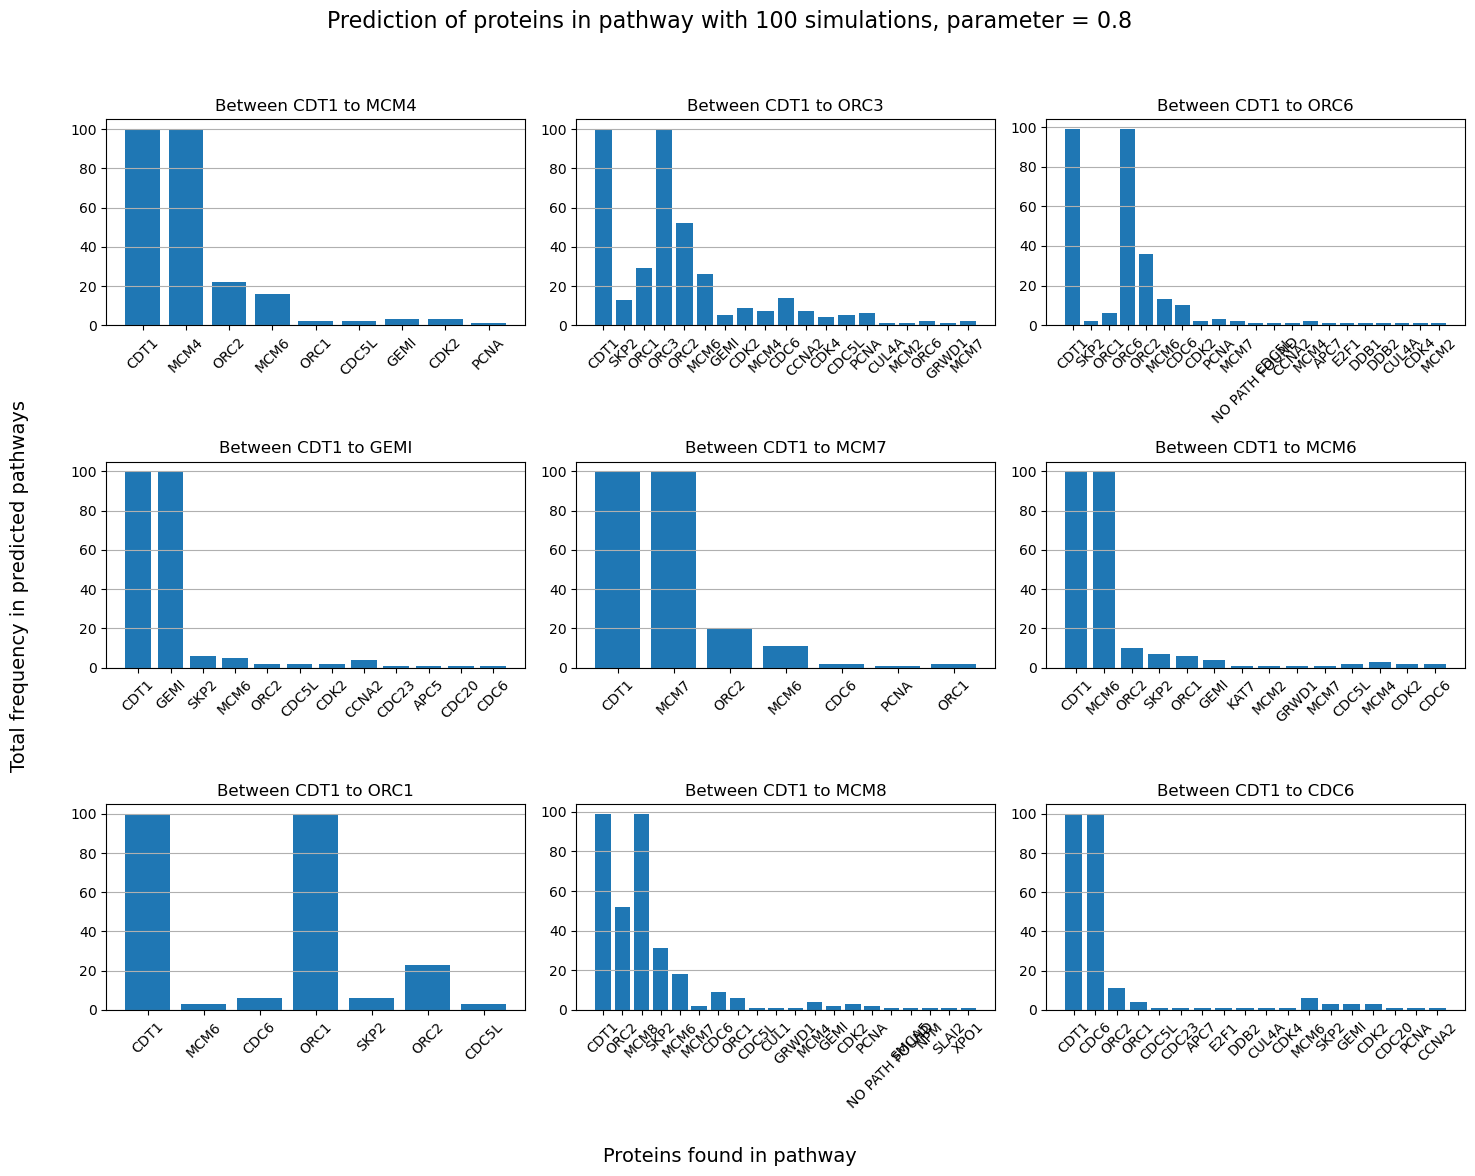

Figure saved to '../assets/CDT1_pathway_prediction_param_0_8.png'


In [110]:
p08 = resimulate_and_plot(G, start_protein, end_proteins, n_times, param=0.8)

### 8) Validate using references

References I used were from the following websites:
* Reactome: https://reactome.org/PathwayBrowser/#/R-HSA-68962
* KEGG: https://www.genome.jp/pathway/map03030

In [124]:
def discard_below_threshold(data, threshold):
    new_data = []
    for dictionary in data:
        filtered_dict = {key: value for key, value in dictionary.items() if value >= threshold}
        new_data.append(filtered_dict)
    return new_data

def discard_100s(data):
    new_data = []
    for dictionary in data:
        filtered_dict = {key: value for key, value in dictionary.items() if value != 100}
        new_data.append(filtered_dict)
    return new_data

In [131]:
validation_threshold = 20
print(end_proteins)

p08_new = discard_100s(discard_below_threshold(p08, validation_threshold))
p10_new = discard_100s(discard_below_threshold(p10, validation_threshold))
p12_new = discard_100s(discard_below_threshold(p12, validation_threshold))

arr = np.vstack((p08_new, p10_new, p12_new))

{'MCM4', 'ORC3', 'ORC6', 'GEMI', 'MCM7', 'MCM6', 'ORC1', 'MCM8', 'CDC6'}


In [133]:
from tabulate import tabulate

table = tabulate(arr, headers=end_proteins, tablefmt="grid")
print(table)

+--------------+--------------------------------------+--------------------------------------+--------+--------------+--------+--------------+--------------------------------------------------+--------+
| MCM4         | ORC3                                 | ORC6                                 | GEMI   | MCM7         | MCM6   | ORC1         | MCM8                                             | CDC6   |
+==============+======================================+======================================+========+==============+========+==============+==================================================+========+
| {'ORC2': 22} | {'ORC1': 29, 'ORC2': 52, 'MCM6': 26} | {'CDT1': 99, 'ORC6': 99, 'ORC2': 36} | {}     | {'ORC2': 20} | {}     | {'ORC2': 23} | {'CDT1': 99, 'ORC2': 52, 'MCM8': 99, 'SKP2': 31} | {}     |
+--------------+--------------------------------------+--------------------------------------+--------+--------------+--------+--------------+----------------------------------------------